### Two wake case - replicating the results from Jacob's paper

Import necessary modules:

In [8]:
# Third party modules
import os 
import sys
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Custom modules
from stream_functions import StreamFunctions
from boundary_conditions import BoundaryConditions
from temporal_stability import TemporalStability
from sivp import SIVP

# Set the path to the current working directory
m_path = os.getcwd()
sys.path.append(m_path)

Declare necessary params:

In [9]:
# for case A,
SL_caseA = {}
SL_caseA['S'] = 1
SL_caseA['Lambda'] = -1.5

# for case B,
SL_caseB = {}
SL_caseB['S'] = 0.38
SL_caseB['Lambda'] = -3.1

# number of wakes and range of wake spacings
num_wakes = 2
wake_spacings = np.linspace(1,5,50)

# temporarily set the param values
val_set = {'S': SL_caseA['S'], 'Lambda': SL_caseA['Lambda'], 'L': 1.0, 'delta': 0.1, 's':1}

# Arbitrary maximum limit attainable for c in temporal stability analysis
max_threshold_for_c = 1e6

# for SIVP,
iter_max = 50
dk_thres = 1e-8

Get a map of $\omega_i(k)$ to choose an appropriate initial guess for saddle point:

In [ ]:
# set up the streamfunctions
sf = StreamFunctions(n_wakes=num_wakes)

# sets up the interfacial boundary conditions and returns the set of equations in matrix form
bc = BoundaryConditions(sf)

# matrices for the generalized eigenvalue problem Ax = cBx
A = bc.A_non_dim
B = bc.B_non_dim

# sets up the generalized eigenvalue problem
ts = TemporalStability(sf, bc, val_set)

# Create a meshgrid for wavenumber space
alpha_r = np.arange(0,20.01,0.5)
alpha_i = np.arange(-20,20,0.5)
#alpha_r = np.arange(0,4,0.05)
#alpha_i = np.arange(-6,6,0.05)
alpha_R, alpha_I = np.meshgrid(alpha_r, alpha_i)
alpha = alpha_R + 1j * alpha_I

# Initialize arrays to store the results
w_vals = np.zeros_like(alpha)

# For each real wavenumber, find the corresponding complex frequency that satisfies the dispersion relation
for i in range(alpha.shape[0]):
    print(f'Row {i+1} of {alpha.shape[0]}')
    for j in range(alpha.shape[1]):
        alpha_val = alpha[i,j]
        c_val_list, eigvecs = ts.find_c(alpha_val)
        temp_w_vals = c_val_list * alpha_val
        temp_w_vals = temp_w_vals[~np.isnan(np.abs(temp_w_vals))]
        temp_w_vals = temp_w_vals[~np.isinf(np.abs(temp_w_vals))]
        temp_w_vals = temp_w_vals[np.abs(temp_w_vals) <= max_threshold_for_c]
        if len(temp_w_vals) == 0:
            w_vals[i,j] = np.nan
        else:
            max_w_val_idx = np.argmax(np.imag(temp_w_vals))
            w_vals[i,j] = temp_w_vals[max_w_val_idx]

Row 1 of 240


C:\Users\tvivek\AppData\Local\Temp\ipykernel_16388\3507482692.py:33: RuntimeWarning: invalid value encountered in multiply
  temp_w_vals = c_val_list * alpha_val


Row 2 of 240
Row 3 of 240
Row 4 of 240
Row 5 of 240
Row 6 of 240
Row 7 of 240
Row 8 of 240
Row 9 of 240
Row 10 of 240
Row 11 of 240
Row 12 of 240
Row 13 of 240
Row 14 of 240
Row 15 of 240
Row 16 of 240
Row 17 of 240
Row 18 of 240
Row 19 of 240
Row 20 of 240
Row 21 of 240
Row 22 of 240
Row 23 of 240
Row 24 of 240
Row 25 of 240
Row 26 of 240
Row 27 of 240
Row 28 of 240
Row 29 of 240
Row 30 of 240
Row 31 of 240
Row 32 of 240
Row 33 of 240
Row 34 of 240
Row 35 of 240
Row 36 of 240
Row 37 of 240
Row 38 of 240
Row 39 of 240
Row 40 of 240
Row 41 of 240
Row 42 of 240
Row 43 of 240
Row 44 of 240
Row 45 of 240
Row 46 of 240
Row 47 of 240
Row 48 of 240
Row 49 of 240
Row 50 of 240
Row 51 of 240
Row 52 of 240
Row 53 of 240
Row 54 of 240
Row 55 of 240
Row 56 of 240
Row 57 of 240
Row 58 of 240
Row 59 of 240
Row 60 of 240
Row 61 of 240
Row 62 of 240
Row 63 of 240
Row 64 of 240
Row 65 of 240
Row 66 of 240
Row 67 of 240
Row 68 of 240
Row 69 of 240
Row 70 of 240
Row 71 of 240
Row 72 of 240
Row 73 of 240


Visually locate the initial guess for saddle point

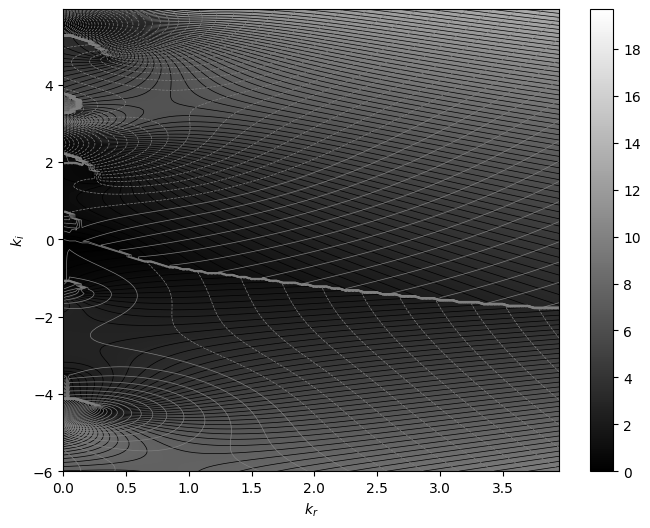

In [11]:
#plt.rcParams.update(plt.rcParamsDefault)
#plt.rcParams.update({
#    "text.usetex": True,
#    "font.family": "serif",
#    "font.serif": ["Computer Modern"],
#})
fig, ax = plt.subplots(figsize=(8, 6))
cs = ax.contourf(alpha_R, alpha_I, np.imag(w_vals), levels=250)
cbar = plt.colorbar(cs)
#cs.set_clim(-100,100)
ax.contour(alpha_R, alpha_I, np.imag(w_vals), levels=100, colors='black', linewidths=0.5)
ax.contour(alpha_R, alpha_I, np.real(w_vals), levels=100, colors='gray', linewidths=0.5)
cs.set_cmap('gray')
ax.set_xlabel('$k_r$')
ax.set_ylabel('$k_i$')
plt.ion()
plt.show()

In [12]:
# save the w_vals to a file
import scipy.io as sio
sio.savemat('C:\\Users\\tvivek\\Desktop\\w_vals_2wakes.mat', {'w_vals': w_vals, 'alpha_R': alpha_R, 'alpha_I': alpha_I})

Use SIVP to get successive saddle point locations

In [13]:
# initial guess for genuine saddle point
#k0j1 = 1 - 3j
k0j1 = 0.5 -0.5j
#k0j1 = 1.5 -10j
w_idx = 3

# initialize the sivp class instance
sivp = SIVP(sf, bc, max_threshold_for_c, val_set)

# initial conditions for the SIVP
ws, q_hats = sivp.get_ws_q_hats(val_set, k0j1)
ws, q_hats = sivp.get_filtered_ws_qhats(ws, q_hats, max_threshold_for_c)
print(ws)

w = ws[w_idx]
qhat = q_hats[:,w_idx]

# necessary result variables
w_vals = np.zeros_like(wake_spacings, dtype=complex)
q_hat_vals = np.zeros((len(wake_spacings), len(qhat)), dtype=complex)
k0j1_vals = np.zeros_like(wake_spacings, dtype=complex)

# set the initial values
w_vals[0] = w
k0j1_vals[0] = k0j1
q_hat_vals[0,:] = qhat

# iterate through the range of wake spacings
for i, wake_spacing in enumerate(wake_spacings):
    print(f'wake_spacing = {wake_spacing}')
    val_set['L'] = wake_spacing
    iter_num = 0
    dk = np.inf

    if i == 0:
        k0j1 = k0j1_vals[0]
        w = w_vals[0]
        qhat = q_hat_vals[0, :]
        continue

    while iter_num < iter_max and dk > dk_thres:
        print('iter_num', iter_num)
        sivp.sub_all(val_set)
        sivp.sub_alpha(k0j1)
        sivp.eval_sub(w, qhat)
        xdot = sivp.eval_xdot()
        w_dot = xdot[-1]
        qhat_dot = xdot[:-1]
        qhat_dot_herm = np.conjugate(qhat_dot)
        qhat_dot_herm = qhat_dot_herm[:, np.newaxis].transpose()

        J2_inv = sivp.get_J2_inv(w, qhat)
        b2 = sivp.get_b2(w, w_dot, qhat, qhat_dot, qhat_dot_herm)

        x_ddot = J2_inv @ b2.ravel()
        d2wdk2 = x_ddot[-1]

        k0j2 = k0j1 - w_dot/d2wdk2

        if np.abs(k0j2 - k0j1) > 15:
            print('Convergence failed')
            w = w_vals[i-1]
            qhat = q_hat_vals[i-1, :]
            k0j1 = k0j1_vals[i-1]
            k0j2 = k0j1_vals[i-1]
            break

        w, qhat = sivp.get_x_multi_SIVP(k0j1, k0j2, w, qhat)

        dk = np.abs(k0j2 - k0j1)
        k0j1 = k0j2
        iter_num += 1

    w_vals[i] = w
    qhat = np.squeeze(qhat)
    q_hat_vals[i, :] = qhat
    k0j1_vals[i] = k0j1

[-5.85683895e+16+1.05534604e+17j  1.64436557e+00+3.03583372e-01j
  1.17963534e-01-1.13946828e+00j -2.63155255e-01+4.34029869e-01j
 -2.35296223e-01+6.86599337e-02j]
wake_spacing = 1.0
wake_spacing = 1.0816326530612246
iter_num 0
(0.50,-0.50) -> (0.50,-0.40) -> (0.53,-0.40) -> (0.53,-0.39)
iter_num 1
(0.53,-0.39) -> (0.53,-0.49) -> (0.43,-0.49) -> (0.43,-0.59) -> (0.33,-0.59) -> (0.33,-0.69) -> (0.23,-0.69) -> (0.23,-0.76) -> (0.13,-0.76) -> (0.03,-0.76) -> (-0.07,-0.76) -> (-0.10,-0.76)


KeyboardInterrupt: 

In [ ]:
# save obtained results
sio.savemat('C:\\Users\\tvivek\\Desktop\\w_2wakes_1.mat', 
            {'S': val_set['S'], 
             'L': val_set['Lambda'], 
             'w_vals': w_vals, 
             'q_hat_vals': q_hat_vals, 
             'k0j1_vals': k0j1_vals, 
             'wake_spacings': wake_spacings})